In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [4]:
mp = pd.read_csv('~/Desktop/MGX_MTX.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,s__Alistipes_finegoldii,s__Alistipes_onderdonkii,s__Alistipes_putredinis,s__Alistipes_shahii,s__Bacteroides_caccae,s__Bacteroides_fragilis,s__Bacteroides_ovatus,s__Bacteroides_stercoris,s__Bacteroides_thetaiotaomicron,s__Bacteroides_uniformis,...,s__Flavonifractor_plautii,s__Lachnospiraceae_bacterium,s__Odoribacter_splanchnicus,s__Parabacteroides_distasonis,s__Parabacteroides_merdae,s__Parasutterella_excrementihominis,s__Phocaeicola_vulgatus,s__Roseburia_faecis,s__Sutterella_wadsworthensis,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,11.104100,3.470390,13.270903,12.902778,NaN,1.199772,0.377021,NaN,NaN,5.360517,...,NaN,0.010116,3.522687,2.131177,NaN,NaN,0.883868,0.894817,3.121443,CD
CSM79HOL,6.850636,7.382133,5.396357,NaN,0.352720,NaN,0.129891,0.392955,NaN,1.108323,...,2.078507,1.978616,0.594864,0.303368,0.267897,NaN,0.086294,NaN,4.109106,CD
CSM67U9D,10.487778,7.021141,6.553470,NaN,0.675703,NaN,0.263840,0.605987,0.191110,1.280091,...,2.220173,7.038896,2.135177,1.064378,0.598466,NaN,0.445474,0.213074,5.579807,CD
HSM7J4N4,NaN,NaN,0.857442,0.603859,0.531606,0.009174,NaN,NaN,0.176419,0.444967,...,NaN,NaN,0.788725,NaN,NaN,NaN,0.433975,NaN,NaN,CD
CSM79HJS,NaN,NaN,11.340492,NaN,2.015792,0.904113,0.651762,0.040231,NaN,NaN,...,3.486033,NaN,NaN,NaN,NaN,2.292833,0.541302,NaN,NaN,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSM7J4R2,5.612269,6.286286,NaN,8.943622,NaN,NaN,0.306209,1.159973,NaN,NaN,...,4.389639,0.027992,NaN,NaN,NaN,4.430873,NaN,NaN,NaN,nonIBD
MSM79H9A,NaN,1.202010,0.812193,2.782462,0.823045,NaN,0.403168,NaN,NaN,0.494446,...,NaN,NaN,NaN,0.567883,NaN,NaN,1.218928,NaN,NaN,nonIBD
HSM7J4KK,4.774676,NaN,2.148207,6.367057,0.475577,0.295839,0.267605,0.468501,NaN,0.894038,...,NaN,NaN,0.742263,0.655950,1.208196,NaN,0.200572,NaN,4.711501,nonIBD


In [5]:
select_sampels_MGX = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels_MTX = pd.read_csv('~/Desktop/selected_samples_MTX.csv')
select_sampels_MGX = select_sampels_MGX.set_index('External ID')
select_sampels_MTX = select_sampels_MTX.set_index('External ID')
select_sampels_MGX.drop("Participant ID", inplace=True, axis=1)
select_sampels_MTX.drop("Participant ID", inplace=True, axis=1)

# select_sampels = pd.concat([select_sampels_MGX,select_sampels_MTX])
# select_sampels = pd.read_csv('~/Desktop/fecalcal_higher.csv')
# select_sampels = select_sampels.set_index('External ID')
# select_sampels.drop(["Participant ID","Unnamed: 0"], inplace=True, axis=1)
select_sampels_MTX

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,12.70000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19F,263.01820,CD
PSM7J19N,13.47861,nonIBD
PSM7J17X,16.97915,nonIBD


In [6]:
# mp = mp.loc[select_sampels_MTX.index,:]
# mp = mp.merge(select_sampels, how='inner', left_index=True, right_index=True)
# mp = mp.loc[:,mp.columns.str.startswith('s__')]
# mp["diagnosis"] = select_sampels_MTX.iloc[:,-1]
# mp.to_csv("~/Desktop/Metaphlan3_to_cox.csv")
mp.replace(np.nan,0, inplace=True)
mp

,s__Alistipes_finegoldii,s__Alistipes_onderdonkii,s__Alistipes_putredinis,s__Alistipes_shahii,s__Bacteroides_caccae,s__Bacteroides_fragilis,s__Bacteroides_ovatus,s__Bacteroides_stercoris,s__Bacteroides_thetaiotaomicron,s__Bacteroides_uniformis,...,s__Flavonifractor_plautii,s__Lachnospiraceae_bacterium,s__Odoribacter_splanchnicus,s__Parabacteroides_distasonis,s__Parabacteroides_merdae,s__Parasutterella_excrementihominis,s__Phocaeicola_vulgatus,s__Roseburia_faecis,s__Sutterella_wadsworthensis,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,11.104100,3.470390,13.270903,12.902778,0.000000,1.199772,0.377021,0.000000,0.000000,5.360517,...,0.000000,0.010116,3.522687,2.131177,0.000000,0.000000,0.883868,0.894817,3.121443,CD
CSM79HOL,6.850636,7.382133,5.396357,0.000000,0.352720,0.000000,0.129891,0.392955,0.000000,1.108323,...,2.078507,1.978616,0.594864,0.303368,0.267897,0.000000,0.086294,0.000000,4.109106,CD
CSM67U9D,10.487778,7.021141,6.553470,0.000000,0.675703,0.000000,0.263840,0.605987,0.191110,1.280091,...,2.220173,7.038896,2.135177,1.064378,0.598466,0.000000,0.445474,0.213074,5.579807,CD
HSM7J4N4,0.000000,0.000000,0.857442,0.603859,0.531606,0.009174,0.000000,0.000000,0.176419,0.444967,...,0.000000,0.000000,0.788725,0.000000,0.000000,0.000000,0.433975,0.000000,0.000000,CD
CSM79HJS,0.000000,0.000000,11.340492,0.000000,2.015792,0.904113,0.651762,0.040231,0.000000,0.000000,...,3.486033,0.000000,0.000000,0.000000,0.000000,2.292833,0.541302,0.000000,0.000000,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSM7J4R2,5.612269,6.286286,0.000000,8.943622,0.000000,0.000000,0.306209,1.159973,0.000000,0.000000,...,4.389639,0.027992,0.000000,0.000000,0.000000,4.430873,0.000000,0.000000,0.000000,nonIBD
MSM79H9A,0.000000,1.202010,0.812193,2.782462,0.823045,0.000000,0.403168,0.000000,0.000000,0.494446,...,0.000000,0.000000,0.000000,0.567883,0.000000,0.000000,1.218928,0.000000,0.000000,nonIBD
HSM7J4KK,4.774676,0.000000,2.148207,6.367057,0.475577,0.295839,0.267605,0.468501,0.000000,0.894038,...,0.000000,0.000000,0.742263,0.655950,1.208196,0.000000,0.200572,0.000000,4.711501,nonIBD


In [7]:
MTX_X = mp.iloc[:,1:25]
MTX_y = mp.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
RandomForestClassifier(max_features=2, min_samples_split=5, n_estimators=50,
                       random_state=100)


<AxesSubplot:>

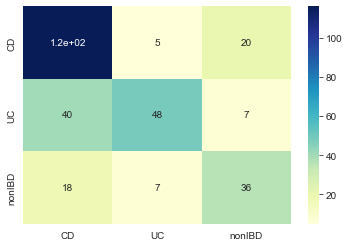

In [8]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=100)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'roc_auc') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

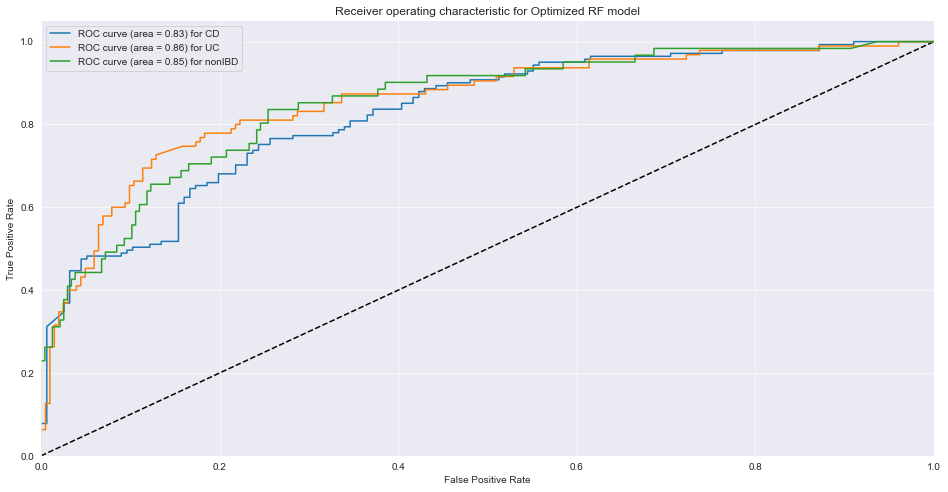

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(RF_clf, X_test, y_test, n_classes, figsize=(12, 6)):
    y_score = RF_clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Optimized RF model')
    labels = np.unique(y_test)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {round(roc_auc[i],2)}) for {labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.8)
    sns.despine()
    plt.show()
    return fig

RF_model_optimized_roc_auc_curve = plot_multiclass_roc(RF_clf, X_test, y_test, n_classes=3, figsize=(16, 8))